In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from timeit import default_timer as timer
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from skimage import io

from sklearn.preprocessing import StandardScaler

import nltk
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


In [62]:
#data = pd.read_parquet("data/3-Rbot-20110812.binetflow.parquet")
data = pd.read_csv("dataset_lab1.csv")

In [63]:
data.head()

Dur  Sport  Dport  sTos  dTos  TotPkts  TotBytes  SrcBytes  Label  \
0   0.069790  13363  57021   0.0   0.0        2       120        60      0   
1   1.306928   2163    443   0.0   0.0        6       366       186      1   
2   0.000186  46350     53   0.0   0.0        2       214        81      0   
3  17.723129  49618     80   0.0   0.0        8       492       246      0   
4   0.175398   1278     53   0.0   0.0        2       438        87      1   

   Proto_icmp  ...  State_SA_R  State_SPA_FSPA  State_SPA_SPA  State_SPA_SRPA  \
0           0  ...           0               0              0               0   
1           0  ...           0               0              0               0   
2           0  ...           0               0              0               0   
3           0  ...           0               0              0               0   
4           0  ...           0               0              0               0   

   State_SRA_SA  State_SRPA_FSPA  State_SRPA_SPA  State_SR_SA  State_S_RA  \
0             0                0               0            0           0   
1             0                0               0            0           1   
2             0                0               0            0           0   
3             0                0               0            0           0   
4             0                0               0            0           0   

   State_S_SA  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 34 columns]

In [64]:
data.describe()

Dur          Sport  Dport  sTos  dTos  TotPkts  TotBytes  SrcBytes  Label  Proto_icmp  Proto_tcp  Proto_udp  Dir_   ->  Dir_  <->  State_CON  State_ECO  State_FSA_FSA  State_FSA_FSPA  State_FSPA_FSA  State_FSPA_FSPA  State_FSPA_FSRPA  State_FSRPA_FSPA  State_FSRPA_SPA  State_PA_PA  State_SA_R  State_SPA_FSPA  State_SPA_SPA  State_SPA_SRPA  State_SRA_SA  State_SRPA_FSPA  State_SRPA_SPA  State_SR_SA  State_S_RA  State_S_SA
0.000015     0      0      0.0   0.0   2        196       98        0      1           0          0          0          1          0          1          0              0               0               0                0                 0                 0                0            0           0               0              0               0             0                0               0            0           0             3
0.017492     1025   53     0.0   0.0   2        540       87        1      0           0          1          0          1          1          0  

Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.
Приклад: https://github.com/natsakh/Data-Analysis/tree/main/Pr_3

In [65]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [70]:
pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_data)
pc_data = pd.DataFrame(data = pca_data, columns=['component_1', 'component_2'])
pc_data

component_1  component_2
0        -2.667054     0.367988
1         3.053204    -0.210696
2        -2.502336    -0.067033
3         1.553184     0.177477
4        -1.460061    -0.237839
...            ...          ...
64803     2.860670    -0.185405
64804     3.040237    -0.208991
64805     1.592478     0.403977
64806     1.667660     0.537606
64807     2.646786    -0.029753

[64808 rows x 2 columns]

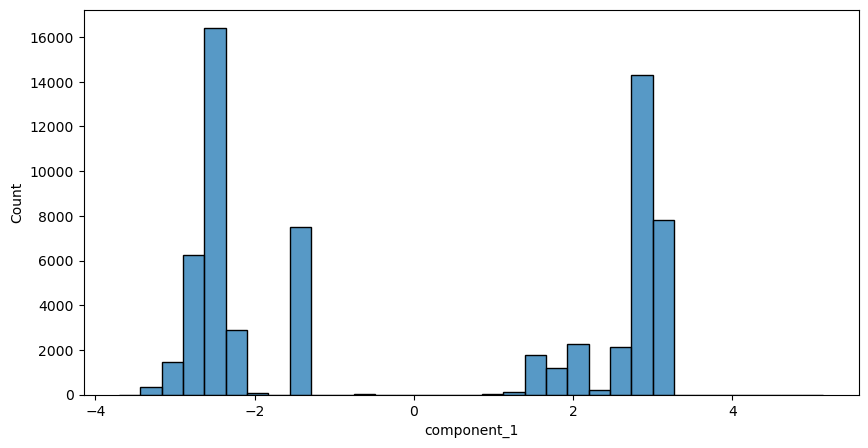

In [69]:
fig, (ax1) = plt.subplots( figsize=(10, 5))
sns.histplot(pc_data['component_1'], ax=ax1)
plt.show()

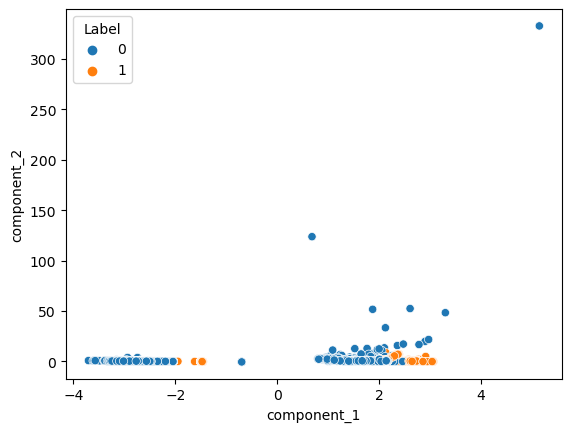

In [53]:
sns.scatterplot(
        x=pc_data['component_1'],
        y=pc_data['component_2'],
        hue=data['Label'],
        legend="full"
    )
plt.show()

In [54]:
tsne = TSNE(n_components=2)

start = timer()
tsne_data = tsne.fit_transform(scaled_data)
end = timer()
print(f"TSNE done in {end-start}s")

tsne_data = pd.DataFrame(data = tsne_data, columns=['component_1', 'component_2'])
tsne_data

TSNE done in 280.2970051000011s


component_1  component_2
0       -21.268728   129.270081
1       119.216438    74.194359
2       -86.161400   -62.566925
3        17.938141    49.822216
4       -10.636198  -102.034172
...            ...          ...
64803     8.853324     4.559254
64804   106.870758     9.072390
64805    29.207115    70.713768
64806     5.623261    76.004150
64807    53.161518    50.603554

[64808 rows x 2 columns]

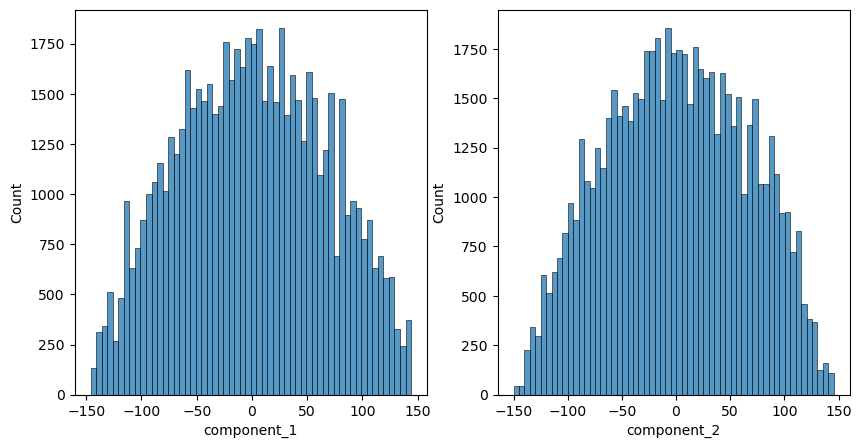

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(tsne_data['component_1'], ax=ax1)
sns.histplot(tsne_data['component_2'], ax=ax2)
plt.show()

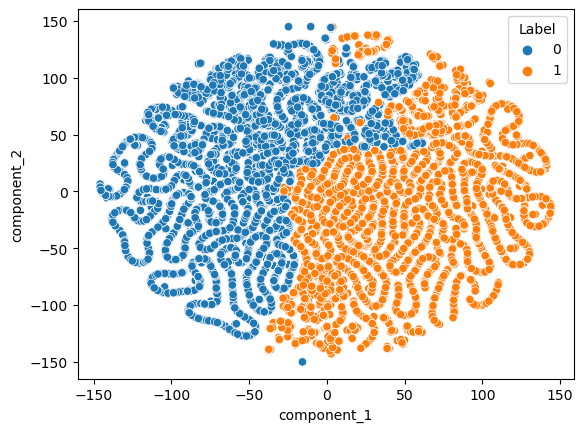

In [57]:
sns.scatterplot(
        x=tsne_data['component_1'],
        y=tsne_data['component_2'],
        hue=data['Label'],
        legend="full"
    )
plt.show()

2. Кластерний аналіз
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.
Приклад: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

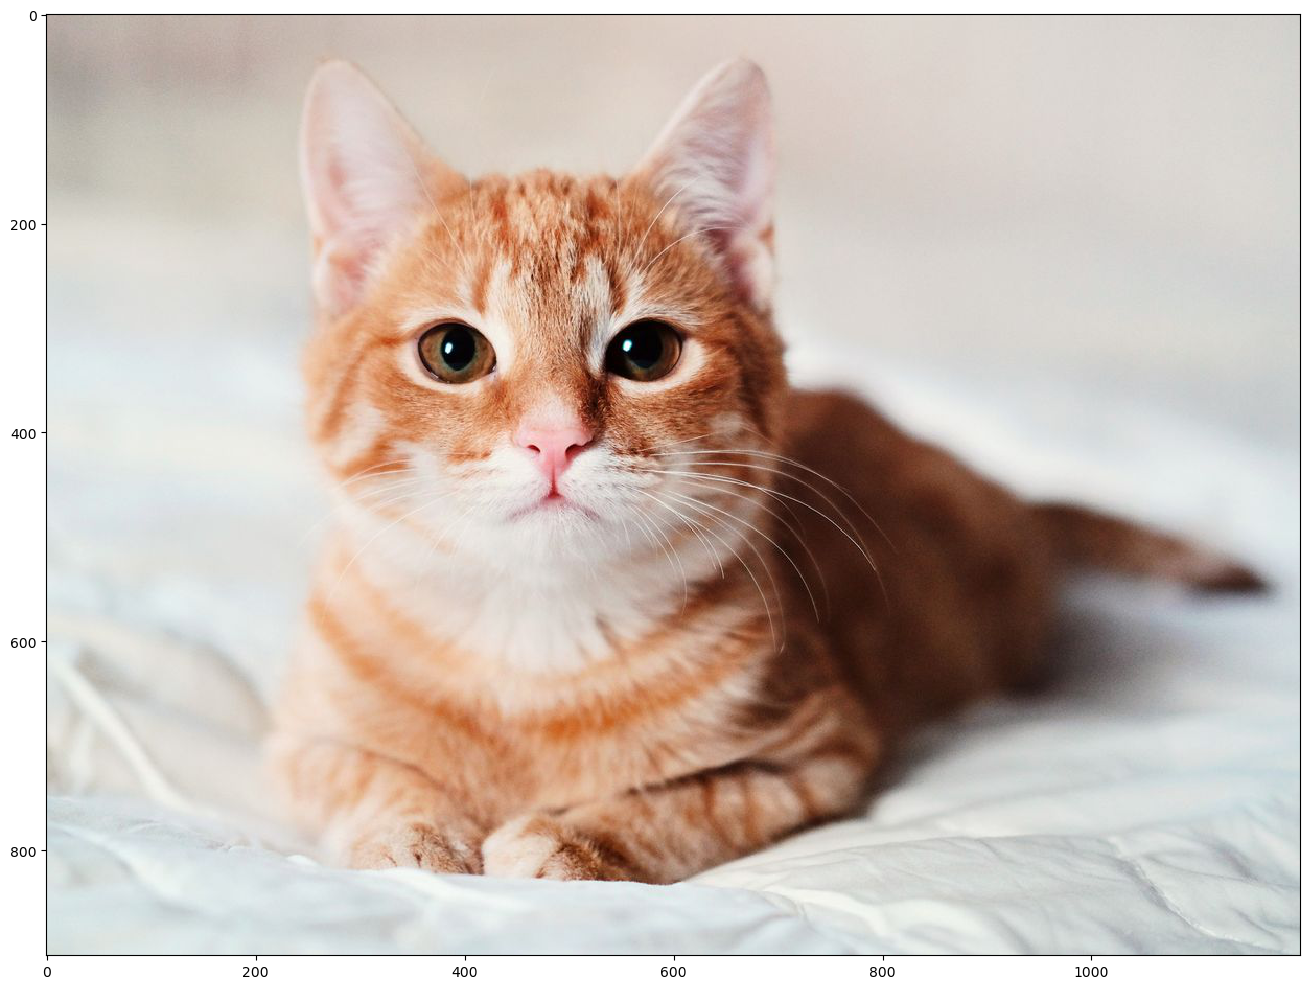

In [71]:
cat_image = io.imread("cat.jpg")
plt.subplots(figsize=(15,10))

io.imshow(cat_image)


In [72]:
cat_image = np.array(cat_image, dtype=np.float64) / 255

w,h,d = original_shape = tuple(cat_image.shape)
assert d == 3
image_array = np.reshape(cat_image, (w*h, d))

In [73]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

c:\Users\tohas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tohas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tohas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tohas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<Figure size 640x480 with 0 Axes>

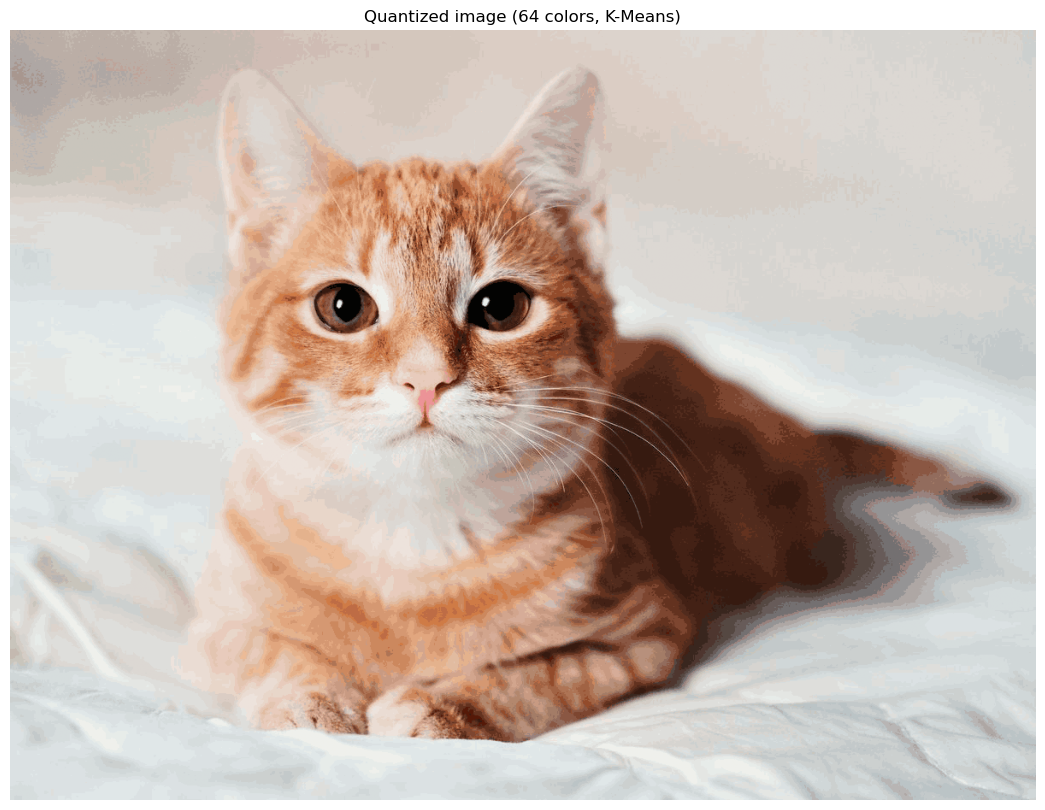

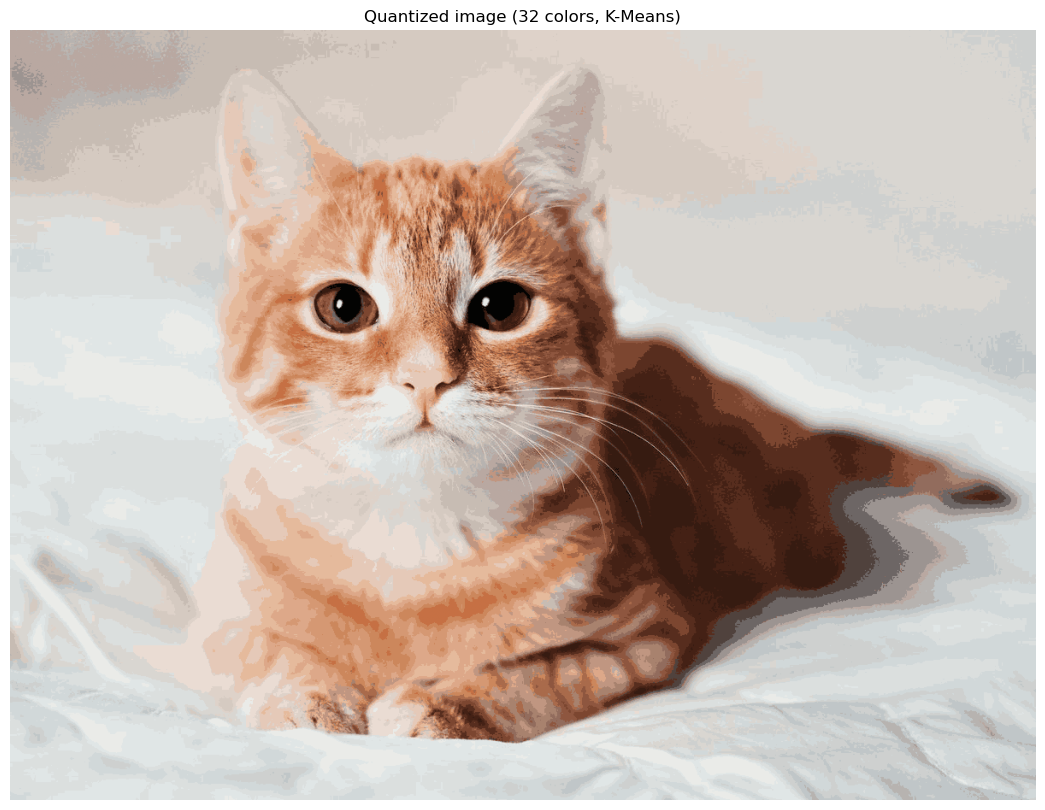

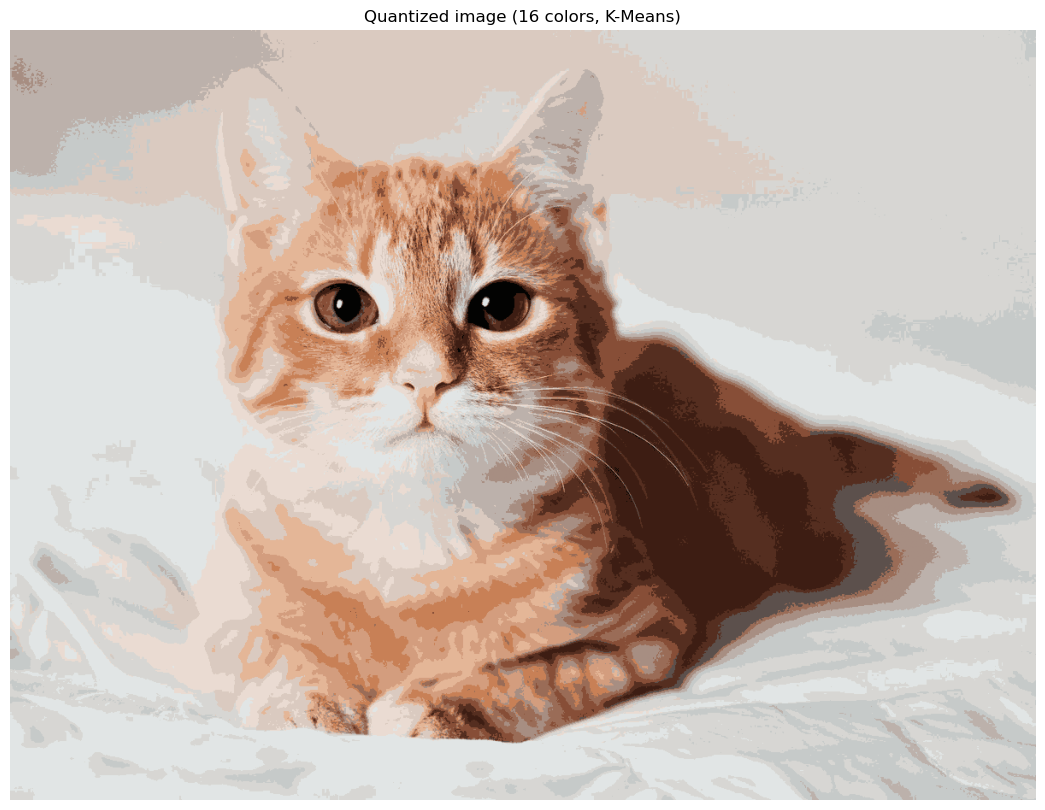

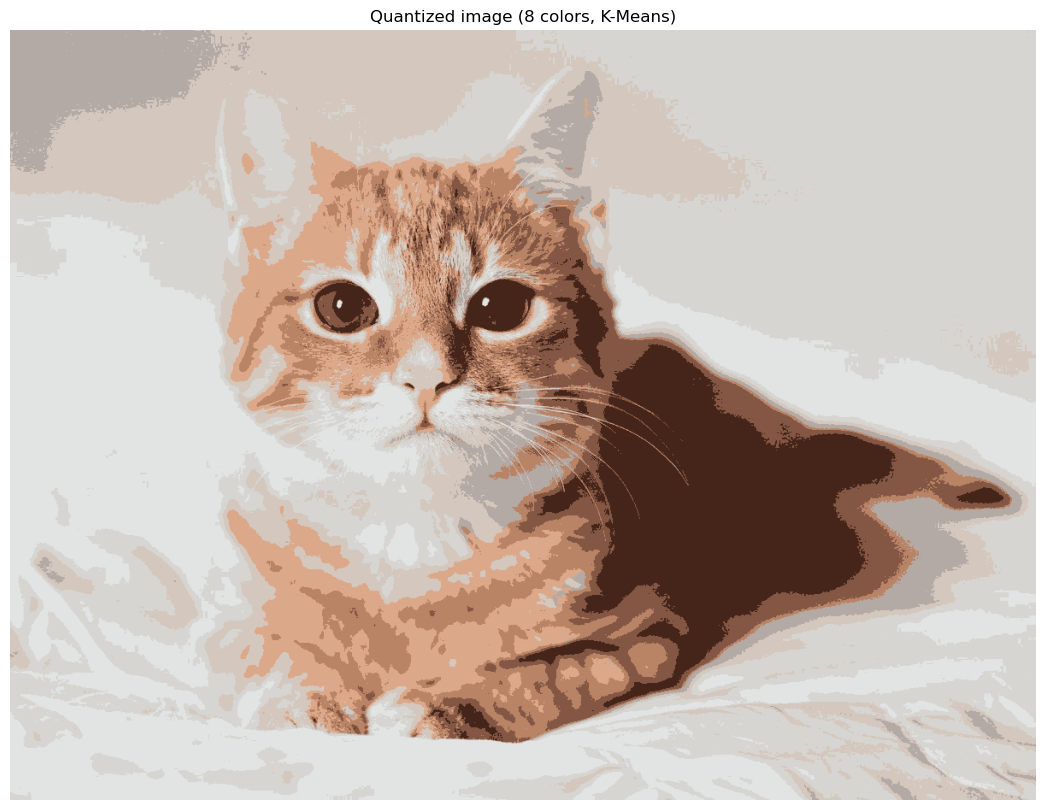

In [74]:
i = 1

for n in [64, 32, 16, 8]:

    train_on = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n, random_state=0).fit(train_on)

    predicted = kmeans.predict(image_array)

    plt.figure(i)
    plt.subplots(figsize=(15,10))

    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, predicted, w, h))
    i+=1

3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 
Приклад: https://github.com/natsakh/Data-Analysis/tree/main/Pr_4

In [2]:
texts_data = pd.read_csv("amazon_reviews.csv")
texts_data.head()

Unnamed: 0  rating                                         reviewText  \
0           0       5  This book was the very first bookmobile book I...   
1           1       1  When I read the description for this book, I c...   
2           2       5  I just had to edit this review. This book is a...   
3           3       5  I don't normally buy 'mystery' novels because ...   
4           4       5  This isn't the kind of book I normally read, a...   

                           summary  
0                50 + years ago...  
1          Boring! Boring! Boring!  
2  Wiggleliscious/new toy ready/!!  
3                  Very good read.  
4                     Great Story!

In [3]:
texts_data = texts_data[texts_data.rating != 3]
texts_data = texts_data[texts_data.rating != 2]
texts_data = texts_data[texts_data.rating != 4]
texts_data.rating.value_counts()

5    3000
1    2000
Name: rating, dtype: int64

In [4]:
texts_data.reviewText = texts_data.reviewText + " " + texts_data.summary
texts_data.drop('Unnamed: 0', inplace=True, axis=1)
texts_data.drop('summary', inplace=True, axis=1)

In [5]:
stop_words = nltk.corpus.stopwords.words("english")
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
texts_data['reviewText'] = texts_data.reviewText.apply(lambda text: ''.join([letter for letter in text if letter not in string.punctuation]))
texts_data['reviewText'] = texts_data.reviewText.apply(lambda text: ' '.join([word for word in text.split(" ") if word not in stop_words]))
lemmatizer = nltk.stem.WordNetLemmatizer()
texts_data['reviewText'] = texts_data.reviewText.apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')]))
texts_data.head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tohas\AppData\Roaming\nltk_data...


rating                                         reviewText
0       5  This book first bookmobile book I bought I sch...
1       1  When I read description book I couldnt wait re...
2       5  I edit review This book I believe I got right ...
3       5  I dont normally buy mystery novel I dont like ...
4       5  This isnt kind book I normally read although I...

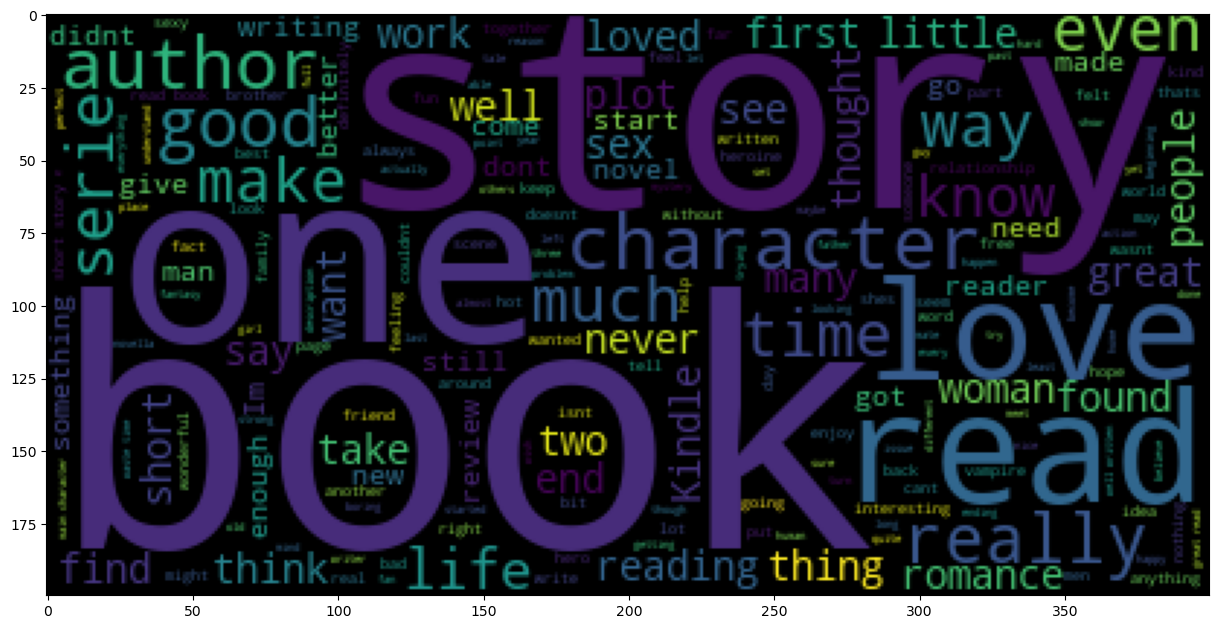

In [14]:
wc = WordCloud(collocations=True).generate(' '.join(texts_data.reviewText.tolist()))
plt.subplots(figsize=(15,10))
plt.imshow(wc)

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts_data.reviewText)
y = texts_data.rating
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
k_values = {}
for k in range(1,10):
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(X_train, y_train)
    k_values[k] = kNN_classifier.score(X_test, y_test)
    #print(kNN_classifier.score(X_test_scaled, y_test))
print(k_values)

{1: 0.846, 2: 0.857, 3: 0.868, 4: 0.882, 5: 0.873, 6: 0.883, 7: 0.888, 8: 0.886, 9: 0.886}


In [22]:
sorted_dict = dict(sorted(k_values.items(),reverse=True, key=lambda item: item[1]))

print(sorted_dict)

{7: 0.888, 8: 0.886, 9: 0.886, 6: 0.883, 4: 0.882, 5: 0.873, 3: 0.868, 2: 0.857, 1: 0.846}


In [23]:
kNN_classifier = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
print(sklearn.metrics.classification_report(y_test, kNN_classifier.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, kNN_classifier.predict(X_test)))

              precision    recall  f1-score   support

           1       0.93      0.78      0.84       392
           5       0.87      0.96      0.91       608

    accuracy                           0.89      1000
   macro avg       0.90      0.87      0.88      1000
weighted avg       0.89      0.89      0.89      1000

[[304  88]
 [ 24 584]]
